In [54]:
import numpy as np
import matplotlib.pyplot as plt

Wir haben in den Referaten bereits einiges über Optimierung gehört.

Nun ist es Zeit für praktische Übungen.
Letztendlich ist Machine Learning ein großes Optimierungsproblem wo man z.B. versucht die Parameters des Netzwerks an Trainingsdaten so anzupassen, dass diese einen möglichst optimalen Output erzeugen.


# 1. Gradient Descent

Gradient Descent wird auch der Weg des steilsten Abstieges genannt.
Ein (lokales) Minimum lässt sich damit finden, indem man ähnlich wie bei einer Wanderung einfach steil bergab geht.
Die Richtung des Abstieges lässt sich mit der/dem Ableitung/Gradient bestimmen.


Gradient Descent lässt sich formal schreiben für eine Funktion $f:\mathbb{R}\mapsto \mathbb{R}$:

$$ x_{n+1} = x_n - \gamma \cdot \frac{\mathrm{d}f}{\mathrm{d}x}\bigg\vert_{x_n} = x_n - \gamma \cdot f'(x_n)$$

In Falle von mehrerer Variablen (z.B. als Vektor gespeichert), gilt für $h:\mathbb{R}^N\mapsto \mathbb{R}^N$

$$ \vec x_{n+1} = \vec x_n - \gamma \cdot (\nabla h)(\vec x_n)$$

In beiden Fällen ist $\gamma$ die Schrittweite.

In [48]:
# TODO
def gradient_descent(df, x0, N, step_size=1e-2):
    """Returns the optimum value for x

    Arguments:
    df: A function which evaluates the derivative/gradient of f
    x0: Start value
    N: number of iterations
    step_size: Step size in each iteration
    """
    
    # aktuelle Position
    x = x0
    
    l = [x0]

    for i in range(N):
        # hier gucken rum und finden steilen Abstieg
        gradient = df(x)
        # hier gehen wir den Schritt
        x = x - step_size * gradient
        l.append(x)

    # gibt das Ergebnis und alle Zwischenwerte zurück
    return x, l

## Beispiel 1.1 Gradient Descent
Implementiere nun eine Funktion und deren Ableitung. Überprüfe, ob der gradient descent Mechanismus funktioniert.

Welche Funktion eignet sich?

In [49]:
def f(x):
    return (x-3)**4
    
# Ableitung von f
def df(x):
    return 4 * (x-3)**3 * 1

In [81]:
x_loesung, small_step = gradient_descent(df, 0, 1000, step_size=0.01)

In [82]:
x_loesung, big_step = gradient_descent(df, 0, 1000, step_size=0.05)

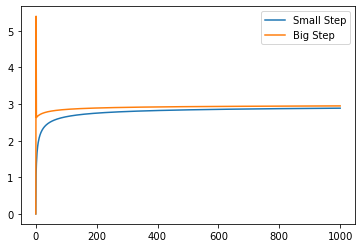

In [84]:
plt.plot(small_step)
plt.plot(big_step)
plt.legend(["Small Step", "Big Step"])

## Beispiel 1.2 Gradient Descent

Implementiere eine Funktion mit mehreren Variablen (z.B. $(x - 21.3) ^2 + (y + 13.1)^4$).

Geht die Implementierung von oben nun auch für den mehrdimensionalen Fall?

In [ ]:
# TODO, Funktion 
def f_2(x):
    return 0
    
# TODO, Ableitung der Funktion
def df_2(x):
    return 0

In [ ]:
gradient_descent(df_2, np.array([0.0, 0.0]), 1000)

## Beispiel 1.3

Implementiere eine gradient descent Funktion, welche sowohl den Funktionswert, als auch $x_n$ in jeder Iteration speichert.
Nutze dafür ein array oder eine Liste.

In [ ]:
def gradient_descent_track(f, df, x0, N, step_size=1e-2):
    
    return x0, log, log_f

In [ ]:
x0, log, log_f = gradient_descent_track(f_2, df_2, np.array([0.0, 0.0]), 300)

## Beispiel 1.4

Plotte den Funktionswert von `f_2` über die Anzahl der Iterationen.
Plotte in ein neues Fenster die Werte der Variablen über die Anzahl der Iterationen.

# 2. Automatic Differentation

Bisher war es recht mühsam, da wir die Ableitung per Hand ausgerechnet haben.
Zum Glück müssen wir das bei unseren Neuronalen Netzen nicht machen, da PyTorch Mechanismen hierfür eingebaut hat (Automatic Differentation).

Wir wollen nun komplexere Funktionen optimieren, ohne den Gradient per Hand zu berechnen.

In [ ]:
import torch

In [ ]:
# Gegeben ist folgende Funktion g
def g_torch(x):
    return (x[0]-1)**2  + (torch.sqrt(x[1]) - torch.log(x[2]))**2 + x[1]**2 + (torch.log(x[1]) - 2)**2

In [ ]:
def gradient_descent_track_ad(f, x0, N, step_size=1e-2):
    # TODO
    # hier fehlen ein paar Variablen
    
    
    for i in range(N):
        
        l = 0 # TODO, was könnte hier wohl stehen?
        
        # damit wird der gradient berechnet
        l.backward()
        df = x.grad
        # spezielles construct
        with torch.no_grad():
            # step update
            x = 0 # TODO
            
            # spezielles construct 
            x = torch.tensor(x, requires_grad=True)
            
            # speichere hier noch die variablen
            # TODO
            
    return x0, log, log_f

In [ ]:
t_x, t_log, t_log_f = gradient_descent_track_ad(f_2, torch.tensor([1.0, 1.0], requires_grad=True), 
                                                100, 
                                                step_size=0.1)

In [ ]:
plt.plot(t_log)

# 3. Optimierer von PyTorch

PyTorch stellt eine ganze Reihe von verschiedenen Optimierern zur Verfügung.
`ADAM` wird relativ häufig benutzt.

Teste nun verschiedene Arten von Optimierern. Versuche auch eine graphische Darstellung zu machen, in denen du verschiedene Optimierer miteinander hinsichtlich Konvergenz und Startbedingungen vergleichst.

In [20]:
# orientiere dich an der vorherigen Funktion gradient_descent_track_ad
# Im Prinzip müssen nur wenige Teile geändert werden
def ADAM_optimize(f, x0, N, step_size=1e-2):
    # TODO
    
    optimizer = torch.optim.Adam([x], lr=0.1) # initialisiere hier den optimizer
    for i in range(N):
        optimizer.zero_grad()
        l = f(x)
        l.backward()
        optimizer.step()
        
        # speichere hier noch die log values, dies muss wieder innerhalb des `with torch.no_grad():` passieren
 
      
            
    return x, log, log_f

In [ ]:
# definiere die Funktion nun so, dass ein bestimmter optimierer über das keyword argument
# optimizer übergeben werden kann
def optimize(f, x0, N, optimizer=torch.optim.SGD, lr=1e-2):
    # ähnlich
            
    return x, log, log_f

In [ ]:
t_x, t_log, t_log_f = ADAM_optimize(f_2, torch.tensor([0.0, 0.0], requires_grad=True), 100)

In [ ]:
t_x2, t_log2, t_log_f2 = optimize(f_2, torch.tensor([0.0, 0.0], requires_grad=True), 1000,\
                                        optimizer=torch.optim.Adadelta, lr=1)

In [ ]:
plt.plot(t_log)

In [ ]:
plt.plot(t_log2)

# 4. Rosenbrock Funktion

Mache auch die gleichen Vergleiche auch mit der Rosenbrock Funktion.

In [ ]:
def rosenbrock(x):
    return (1.0 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

In [ ]:
t_x_2, t_log_2, t_log_f_2 = torch_optimize(rosenbrock, torch.tensor([0.0, 0.0], requires_grad=True), 500,  lr=0.001)

In [ ]:
plt.plot(t_log_2)

# 5. Weitere Funktionen

Auf Wikipedia findet man eine Reihe ganz verschiedener Funktionen.

Versuche ein paar davon zu optimieren!

https://en.wikipedia.org/wiki/Test_functions_for_optimization

In [ ]:
t_x, t_log, t_log_f = torch_optimize(      , torch.tensor([0.2, 0.2], requires_grad=True), 5000, lr =0.01,\
                                     optimizer=torch.optim.Adadelta)

In [ ]:
plt.plot(t_log)